# ДЗ 2. Кластерный анализ методом к-средних (k-means)

Данные описывают экономические условия в 48 городах мира в 1991 году.
Данные были собраны отделом экономических исследований банка Union
(Швейцария). Описаны экономические условия в 48 городах мира в 1991 году.  
Число наблюдений: 48
Названия переменных:  
City (Город): Название города  
Работа (Work): Взвешенное среднее числа рабочих часов, сосчитанное по 12 профессиям     
Цена (Price): Индекс цен 112 товаров и услуг, включая арендную плату за жилье(значение для Цюриха взято за 100%)    
Заработная плата (Salary): Индекс заработной платы за час работы, сосчитанный по 12 профессиям после налогов и вычетов (значение для Цюриха
взято за 100%)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [51]:
df = pd.read_csv("Econom_Cities_data.csv", sep=";", index_col='City')
df.head(10)

,Work,Price,Salary
City,,,
Amsterdam,1714,"65,6",49
Athens,1792,"53,8","30,4"
Bogota,2152,"37,9","11,5"
Bombay,2052,"30,3","5,3"
Brussels,1708,"73,8","50,5"
Buenos_Aires,1971,"56,1","12,5"
Cairo,-9999,"37,1",-9999
Caracas,2041,61,"10,9"
Chicago,1924,"73,9","61,9"


### Предобработка данных

Необходимо заменить запятые на точки для численных операций. 

In [52]:
df['Price'] = df['Price'].str.replace(',', '.').astype(float)
df['Salary'] = df['Salary'].str.replace(',', '.').astype(float)
df.head(50)


,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


В данной задаче необходима стандартизация, т.к. у признаков разные еденицы измерения.   
Приведем рабочие часы к относительному индексу (значение для Цюриха
взято за 100%)

In [53]:
df['Work'] = round(df['Work']/df.loc['Zurich', 'Work'] * 100, 1)
df.tail()

,Work,Price,Salary
City,,,
Tel_Aviv,107.9,67.3,27.0
Tokyo,100.6,115.0,68.0
Toronto,101.1,70.2,58.2
Vienna,95.3,78.0,51.3
Zurich,100.0,100.0,100.0


Города 'Cairo' и 'Jakarta' имеют некорректные значения. Их восстановление невозможно, поэтому удаляем соответствующие строки. 

In [54]:
df = df.drop(['Cairo', 'Jakarta'])

### Кластеризация

In [55]:
#  максимальное число итераций (задаем пробное)
max_iter_1 = 10

Рассмотрим для начала 4 кластера. 

In [56]:
# инициализация модели
model = KMeans(n_clusters=4, random_state=42, max_iter=max_iter_1, n_init=10, 
               verbose=0, tol=0.0001 )

# random_state - зерно датчика случайных чисел. 
# При повторных вызовах процедуры с тем же значением зерна random_state 
# модель будет давать одинаковые результаты.

In [57]:
# Кластеризация данных из таблицы df
model.fit(df)

,n_clusters,4
,init,'k-means++'
,n_init,10
,max_iter,10
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


Проверим кол-во итераций

In [58]:
if model.n_iter_ == max_iter_1:
    print("Не сошлось за ", model.n_iter_ , " итераций") 
else:
    print("Сошлось за ", model.n_iter_ , " итераций") 

Сошлось за  7  итераций


### Результаты кластеризации

In [59]:
#  Результат кластеризации набора данных из таблицы df
#  Номера кластеров начинаются с 0
model.labels_

array([0, 1, 3, 3, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 3, 3, 1, 0, 0,
       0, 0, 3, 3, 0, 0, 3, 0, 1, 2, 3, 0, 3, 3, 1, 1, 2, 0, 0, 1, 2, 0,
       0, 2], dtype=int32)

In [60]:
# координаты центров кластеров
model.cluster_centers_

array([[ 96.875     ,  77.865     ,  54.125     ],
       [104.87      ,  57.99      ,  22.85      ],
       [ 95.28333333, 108.55      ,  71.3       ],
       [107.12      ,  43.61      ,   8.03      ]])

### Определение кол-ва кластеров

Как определить число кластеров, не угадывая? <br>
Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод ```inertia_``` вернёт сумму квадратов расстояний от каждой точки данных до центра ближайшего к ней кластера. Кластеризацию будем считать условно хорошей, если инерция перестаёт сильно уменьшаться при увеличении числа кластеров.

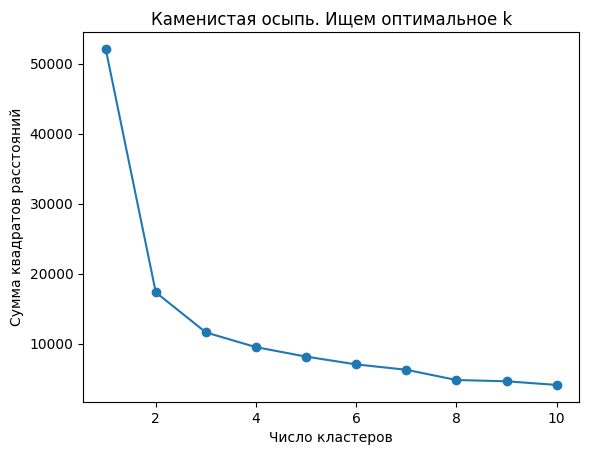

In [61]:
K = range(1, 11)

# Вычисляем значения критерия качества для разного числа кластеров
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

Излом над числом 4. <br>
Тогда 4 кластеров -- это оптимальный выбор. <br>

### Интерпретация

Сравним типичные объекты в разных кластерах.
Посмотрим, по каким переменным различаются кластеры.

Для этого применим метод ```labels_```, а затем посчитаем средние значения переменных для каждого кластера.

In [63]:
df['cluster'] = model.labels_

df.groupby('cluster').mean().sort_values(by = 'Salary')

,Work,Price,Salary
cluster,,,
3,107.120000,43.610,8.030
1,104.870000,57.990,22.850
0,96.875000,77.865,54.125
2,95.283333,108.550,71.300


Получили следующие группы:   
3 - Города с низким уровнем экономического развития - низкие зарплаты и низкие цены, самый долгий рабочий день (Рио-де-Жанейро, Мехико)  
1 - Города с развивающейся экономикой - рабочий день все еще большой, но зарплата уже в разы выше, цены тоже умеренно больше (Сеул, Афины)  
0 - Богатые города - зарплаты в 2 раза больше, чем в предыдущем уровне, цены высокие, рабочий день значительно уменьшился (Париж, Лондон)   
2 - Города-лидеры -  очень высокие цены, самая большая зарплата и самый короткий рабочий день (Токио, Копенгаген). 